In [1]:
import numpy as np
import tensorflow as tf
import keras

In [2]:
def generate_time_series(batch_size,n_steps):
  freq1,freq2,offsets1,offsets2 = np.random.rand(4,batch_size,1)
  time = np.linspace(0,1,n_steps)
  series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 +10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size,n_steps) - 0.5)
  return series[...,np.newaxis].astype(np.float32)

In [3]:
n_steps = 50
series = generate_time_series(10000,n_steps+1)
X_train,y_train = series[:7000,:n_steps],series[:7000,-1]
X_valid,y_valid = series[7000:9000,n_steps],series[7000:9000,-1]
X_test,y_test = series[9000:,n_steps],series[9000:,-1]

In [4]:
y_pred = X_valid[:,-1]
np.mean(keras.losses.mean_squared_error(y_valid,y_pred))

0.296252

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50,1]),
    keras.layers.Dense(1)
])

## 实现一个简单的RNN

In [6]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1,input_shape=[None,1])
])

In [7]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])


In [8]:
print('Number of samples in X_train:', len(X_train))
print('Number of samples in y_train:', len(y_train))


Number of samples in X_train: 7000
Number of samples in y_train: 7000


In [9]:
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
219/219 [==============================] - 3s 8ms/step - loss: 0.2751 - mse: 0.2751
Epoch 2/10
219/219 [==============================] - 2s 8ms/step - loss: 0.2325 - mse: 0.2325
Epoch 3/10
219/219 [==============================] - 2s 7ms/step - loss: 0.1961 - mse: 0.1961
Epoch 4/10
219/219 [==============================] - 2s 10ms/step - loss: 0.1663 - mse: 0.1663
Epoch 5/10
219/219 [==============================] - 2s 11ms/step - loss: 0.1425 - mse: 0.1425
Epoch 6/10
219/219 [==============================] - 2s 7ms/step - loss: 0.1227 - mse: 0.1227
Epoch 7/10
219/219 [==============================] - 2s 8ms/step - loss: 0.1016 - mse: 0.1016
Epoch 8/10
219/219 [==============================] - 2s 8ms/step - loss: 0.0813 - mse: 0.0813
Epoch 9/10
219/219 [==============================] - 2s 8ms/step - loss: 0.0643 - mse: 0.0643
Epoch 10/10
219/219 [==============================] - 2s 8ms/step - loss: 0.0501 - mse: 0.0501


In [10]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {0:.2f}\nTest accuracy: {1:.2f}%'.format(score[0], score[1]*100))


Test loss: 0.01
Test accuracy: 0.57%


## 深度RNN

In [11]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
    keras.layers.SimpleRNN(20,return_sequences=True),
    keras.layers.SimpleRNN(1)
])

In [12]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])


In [13]:
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
219/219 [==============================] - 10s 29ms/step - loss: 0.0213 - mse: 0.0213
Epoch 2/10
219/219 [==============================] - 8s 35ms/step - loss: 0.0039 - mse: 0.0039
Epoch 3/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0035 - mse: 0.0035
Epoch 4/10
219/219 [==============================] - 8s 34ms/step - loss: 0.0033 - mse: 0.0033
Epoch 5/10
152/219 [===================>..........] - ETA: 1s - loss: 0.0032 - mse: 0.0032

KeyboardInterrupt: ignored

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {0:.2f}\nTest accuracy: {1:.2f}%'.format(score[0], score[1]*100))


In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.fit(X_train, y_train, epochs=10, batch_size=32)


In [ ]:
# 预测未来一个时间步长
input_data = X_test[:1]
prediction = model.predict(input_data)
print('Prediction for next timestep:', prediction)

## 预测未来几个时间步长

In [14]:
series = generate_time_series(1,n_steps + 10)
X_new,Y_new = series[:,:n_steps],series[:,n_steps:]
X = X_new
for step_ahead in range(10):
  y_pred_one = model.predict(X[:,step_ahead:])[:,np.newaxis,:]
  X = np.concatenate([X,y_pred_one],axis=1)
  
Y_pred = X[:,n_steps:]

1/1 [==============================] - 0s 48ms/step


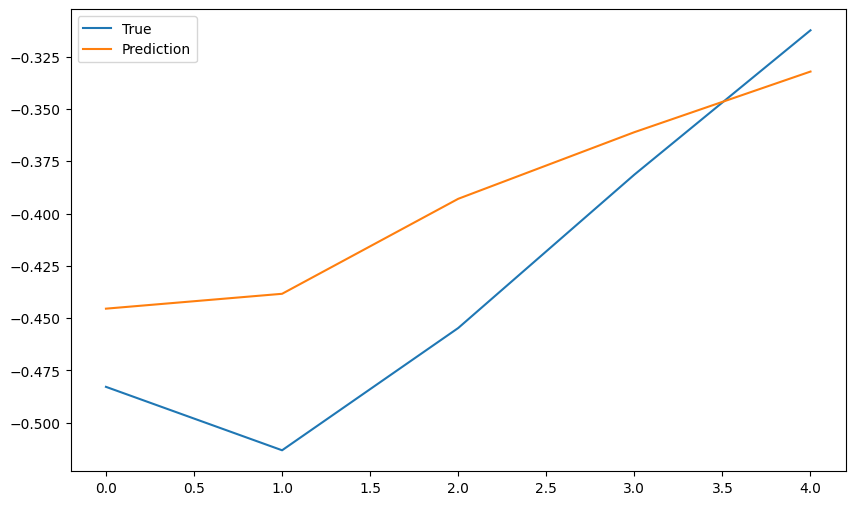

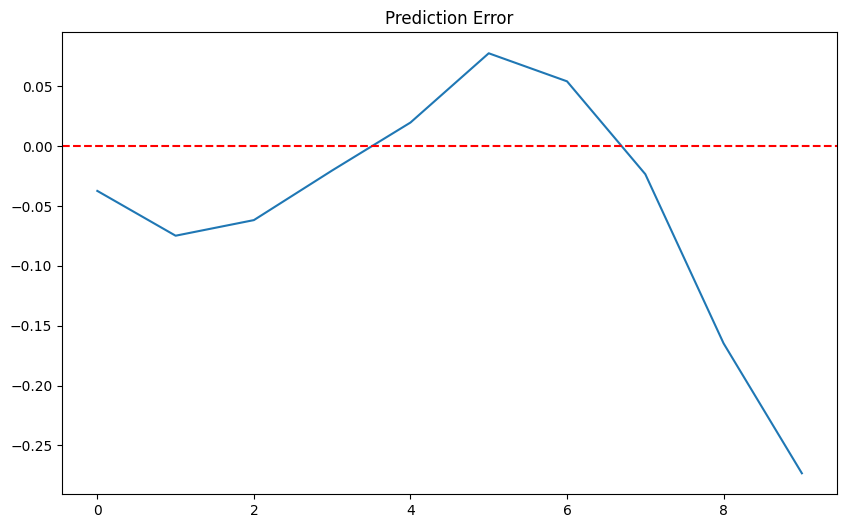

In [15]:
import matplotlib.pyplot as plt

# 绘制真实标签和预测标签之间的对比
def plot_comparison(Y_true, Y_pred):
    plt.figure(figsize=(10,6))
    plt.plot(Y_true, label='True')
    plt.plot(Y_pred, label='Prediction')
    plt.legend(loc='upper left')
    plt.show()

# 对比真实标签和预测标签序列中的前n个时间步长
n = 5
plot_comparison(Y_new[0,:n], Y_pred[0,:n])

# 绘制真实标签和预测标签之间的误差
def plot_error(Y_true, Y_pred):
    plt.figure(figsize=(10,6))
    plt.plot(Y_true - Y_pred)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Prediction Error')
    plt.show()

plot_error(Y_new[0], Y_pred[0])


一次性预测10个值

In [16]:
series = generate_time_series(10000,n_steps+10)
X_train, Y_train = series[:7000,:n_steps],series[:7000,-10:,0]
X_valid,Y_valid = series[7000:9000,:n_steps],series[7000:9000,-10:,0]
X_test,Y_test = series[9000:,:n_steps],series[9000:,-10:,0]

In [17]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

In [18]:
y_pred = model.predict(X_new)
Y = np.empty((10000,n_steps,10))
for step_ahead in range(1,10+1):
  Y[:,:,step_ahead - 1] = series[:,step_ahead:step_ahead+n_steps,0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

1/1 [==============================] - 0s 496ms/step


In [19]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
    keras.layers.SimpleRNN(20,return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [20]:
def last_time_step_mse(Y_true,Y_pred):
  return keras.metrics.mean_squared_error(Y_true[:,-1],y_pred[:,-1])

optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss="mse",optimizer=optimizer,metrics=[last_time_step_mse])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
y_pred = X_valid[:,-1]
np.mean(keras.losses.mean_squared_error(y_valid,y_pred))

0.30331746